In [42]:
import cv2
import os
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [43]:
# declare folder paths
# 1. folders should be at the root
# 2. folder name should be the class name as well
FOLDER_PATHS = [
    'Spinach',
    'Cucumber',
]

In [44]:
image_path = []

for folder in FOLDER_PATHS:
    class_path = os.listdir(os.path.join('cleaned_data', folder))
    for path in class_path:
        file_path = os.path.join('cleaned_data', folder, path)
        image_path.append(path)
        image = cv2.imread(file_path)
        #normalize images
        if image is not None:
            img = image/255.0      


In [45]:
new_size = (224,224)
resized_image = cv2.resize(img, new_size)

width_scale = 224.0/img.shape[1]
height_scale = 224.0/img.shape[0]

for folder in FOLDER_PATHS:
    img_path = os.path.join('cleaned_data', folder)
    csv_path = os.path.join('cleaned_data',folder, f'{folder}_annotations.csv')
    df = pd.read_csv(csv_path)

    df.loc['width'] = new_size[0]
    df.loc['height'] = new_size[1]

    for image in os.listdir(img_path):
        image = image[:-4]

        for index, row in df.iterrows():
            if df['filename'][index] == image:
                df.loc[index, 'xmin'] = row['xmin'] * width_scale
                df.loc[index, 'ymin'] = row['ymin'] * width_scale
                df.loc[index, 'xmax'] = row['xmax'] * width_scale
                df.loc[index, 'ymax'] = row['ymax'] * width_scale

    df.to_csv(csv_path)

C:\Users\Femi\AppData\Local\Temp\ipykernel_35864\826242356.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '34.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'xmin'] = row['xmin'] * width_scale
C:\Users\Femi\AppData\Local\Temp\ipykernel_35864\826242356.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'ymin'] = row['ymin'] * width_scale
C:\Users\Femi\AppData\Local\Temp\ipykernel_35864\826242356.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '192.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'xmax'] = row['

<function matplotlib.pyplot.show(close=None, block=None)>

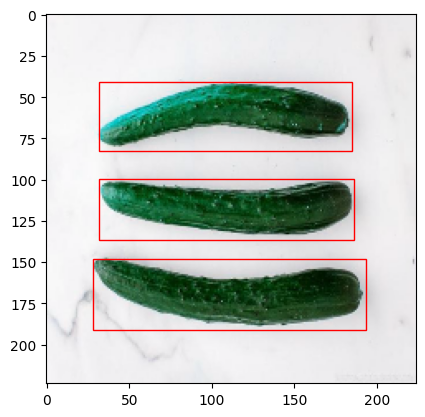

In [50]:
#SAMPLE
img = cv2.imread('cleaned_data\Cucumber\Cucumber_110.png')
sample_resized_image = cv2.resize(img, (224,224))
df_sample = pd.read_csv('cleaned_data\Cucumber\Cucumber_annotations.csv')

boxes = []

for index, row in df.iterrows() :
    if df['filename'][index] == 'Cucumber_110':
        temp_box = []
        temp_box.append(row['xmin'])
        temp_box.append(row['ymin'])
        temp_box.append(row['xmax'])
        temp_box.append(row['ymax'])
        boxes.append(temp_box)

fig, ax = plt.subplots(1)

ax.imshow(sample_resized_image)

for box in boxes:
    rect = patches.Rectangle((box[0], box[1]),
                                     box[2] - box[0],
                                     box[3] - box[1],
                                     linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show